In [ ]:
!pip install lipstick

In [2]:
import matplotlib.pyplot as plt
import torch
import numpy as np
from sklearn.datasets import make_moons, make_swiss_roll
from lipstick import GifMaker

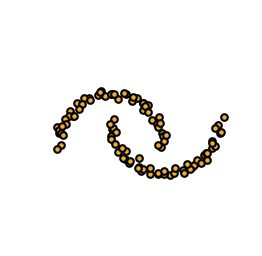

In [3]:
x_0_moon, c = make_moons(100, noise=0.05)
x_0_moon = torch.Tensor(x_0_moon)

x_0_moon = (x_0_moon - x_0_moon.mean()) / x_0_moon.std()

fig, ax = plt.subplots(figsize=(2, 2), dpi=150)
ax.scatter(*x_0_moon.T, s=10, c='#EDAC32', edgecolor='k')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.axis('off')
plt.show()

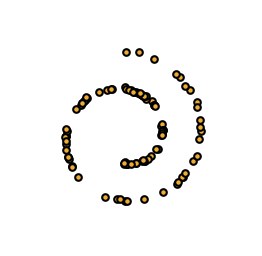

In [4]:
x_0_roll, c = make_swiss_roll(100, noise=0.1)
x_0_roll = x_0_roll[:, [0, 2]]

x_0_roll = torch.Tensor(x_0_roll)

x_0_roll = (x_0_roll - x_0_roll.mean()) / x_0_roll.std()

fig, ax = plt.subplots(figsize=(2, 2), dpi=150)
ax.scatter(*x_0_roll.T, s=10, c='#EDAC32', edgecolor='k')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.axis('off')
plt.show()

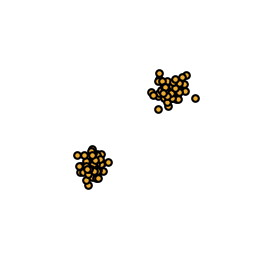

In [5]:
x_0_mog = np.concatenate([
    np.random.normal(loc=-1, scale=0.2, size=(50, 2)),
    np.random.normal(loc=1, scale=0.2, size=(50, 2))
])
x_0_mog = torch.Tensor(x_0_mog)

fig, ax = plt.subplots(figsize=(2, 2), dpi=150)
ax.scatter(*x_0_mog.T, s=10, c='#EDAC32', edgecolor='k')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.axis('off')
plt.show()

100%|██████████| 50/50 [00:05<00:00,  8.66it/s]


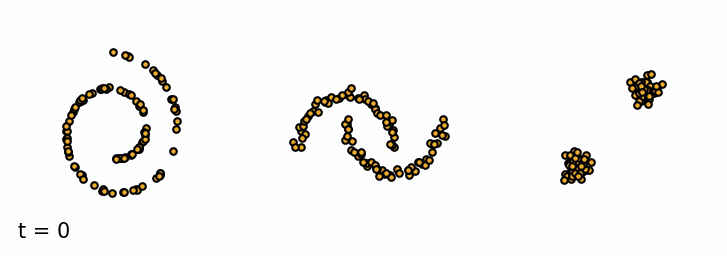

In [10]:
from tqdm import tqdm
x_roll = x_0_roll.clone()
x_moon = x_0_moon.clone()
x_mog = x_0_mog.clone()
beta = 0.01

with GifMaker("sample.gif", fps=10) as g:
  fig, axs = plt.subplots(1, 3, figsize=(6, 2), dpi=150)

  for ax, x in zip(axs, [x_roll, x_moon, x_mog]):
    ax.scatter(*x.T, s=10, c='#EDAC32', edgecolor='k')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.axis('off')

    # ax.set_title('t = 0')

  axs[0].text(-2.9, -2.9, 't = 0')

  for _ in range(5):
    g.add(fig)

  for i in tqdm(range(50)):
    x_roll = x_roll * np.sqrt((1 - beta)) + np.sqrt(beta) * torch.randn(len(x_0_roll), 2)
    x_moon = x_moon * np.sqrt((1 - beta * 1.5)) + np.sqrt(beta * 1.5) * torch.randn(len(x_0_moon), 2)
    x_mog = x_mog * np.sqrt((1 - beta * 2)) + np.sqrt(beta * 2) * torch.randn(len(x_0_mog), 2)

    fig, axs = plt.subplots(1, 3, figsize=(6, 2), dpi=150)

    for ax, x in zip(axs, [x_roll, x_moon, x_mog]):
      ax.scatter(*x.T, s=10, c='#EDAC32', edgecolor='k')
      ax.set_xlim(-3, 3)
      ax.set_ylim(-3, 3)
      ax.axis('off')

      # ax.set_title(f't = {i + 1}')
    axs[0].text(-2.9, -2.9, f't = {i + 1}')
  
    g.add(fig)

g.show()

In [19]:
import seaborn as sns
sns.set_context('talk')

In [72]:
x_0_mog = np.concatenate([
    np.random.normal(loc=-1, scale=0.2, size=(500)),
    np.random.normal(loc=4, scale=0.2, size=(500))
])
x_0_mog = torch.Tensor(x_0_mog)
x_mog = x_0_mog.clone()

beta = 0.9

for i in range(10000):
  x_mog = x_mog * (1 - beta) + np.sqrt(2 * beta) * torch.randn(len(x_0_mog))

# fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
# ax.hist(x_0_mog.T, bins=np.linspace(-3, 3, 30), density=True)
# ax.hist(x_mog, bins=np.linspace(-3, 3, 30), density=True)
# ax.set_xlim(-3, 3)
# plt.show()

x_mog.mean(), x_mog.std()

(tensor(0.0060), tensor(1.3569))

In [73]:
x_0_mog = np.concatenate([
    np.random.normal(loc=-1, scale=0.2, size=(500)),
    np.random.normal(loc=4, scale=0.2, size=(500))
])
x_0_mog = torch.Tensor(x_0_mog)
x_mog = x_0_mog.clone()

beta = 0.99

for i in range(1000):
  x_mog = x_mog * np.sqrt(1 - beta) + np.sqrt(beta) * torch.randn(len(x_0_mog))

# fig, ax = plt.subplots(figsize=(4, 4), dpi=150)
# ax.hist(x_0_mog.T, bins=np.linspace(-3, 3, 30), density=True)
# ax.hist(x_mog, bins=np.linspace(-3, 3, 30), density=True)
# ax.set_xlim(-3, 3)
# plt.show()

x_mog.mean(), x_mog.std()

(tensor(-0.0263), tensor(0.9709))

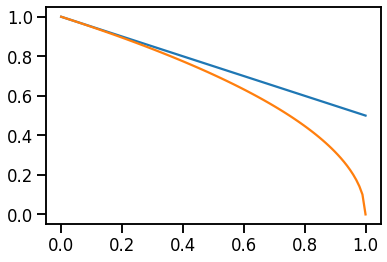

In [62]:
x = np.linspace(0, 1, 100)
plt.plot(x, 1 - 1/2 * x)
plt.plot(x, np.sqrt(1 - x))

In [90]:
def gauss(x, mu=0, std=1):
  return np.exp(-(x - mu)**2 / (2 * std))

(0.0, 1.0)

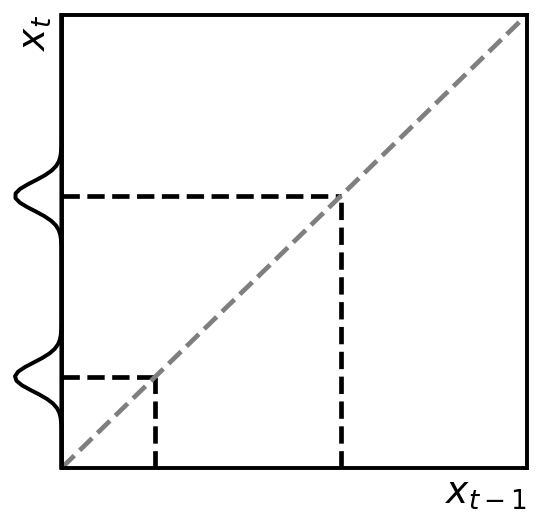

In [122]:
plt.figure(figsize=(4,4), dpi=150)
plt.plot([0, 1], [0, 1], c='tab:gray', ls='--')
plt.xticks([])
plt.yticks([])
plt.xlabel('$x_{t-1}$', horizontalalignment='right', x=1.0)
plt.ylabel('$x_t$', horizontalalignment='right', y=1.0)

plt.vlines(0.2, 0, 0.2, ls='--')
plt.hlines(0.2, 0, 0.2, ls='--')

plt.vlines(0.6, 0, 0.6, ls='--')
plt.hlines(0.6, 0, 0.6, ls='--')

y = np.linspace(0, 0.999, 100)

plt.plot(gauss(y, mu=0.2, std=0.001) * -0.1 - 0.001, y, c='k', clip_on=False, lw=1.9)
plt.plot(gauss(y, mu=0.6, std=0.001) * -0.1 - 0.001, y, c='k', clip_on=False, lw=1.9)

plt.xlim(0, 1)
plt.ylim(0, 1)

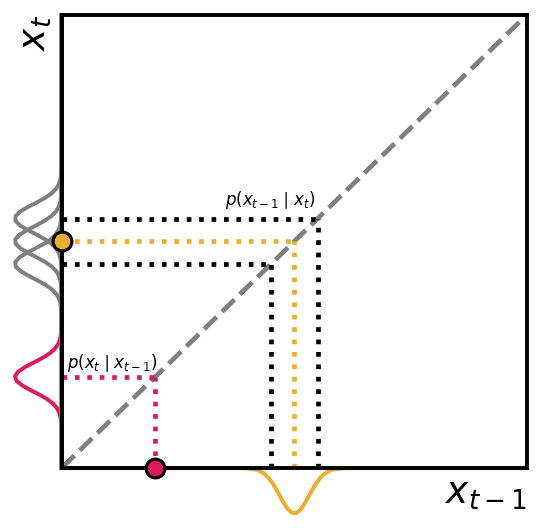

In [233]:
plt.figure(figsize=(4,4), dpi=150)
plt.plot([0, 1], [0, 1], c='tab:gray', ls='--', zorder=-1)
plt.xticks([])
plt.yticks([])
plt.xlabel('$x_{t-1}$', horizontalalignment='right', x=1.0)
plt.ylabel('$x_t$', horizontalalignment='right', y=1.0)

_x = 0.5
plt.vlines(_x, 0, _x, ls=':', color='#EDAC32')
plt.hlines(_x, 0, _x, ls=':', color='#EDAC32')

_x = 0.45
plt.vlines(_x, 0, _x, ls=':', color='k')
plt.hlines(_x, 0, _x, ls=':', color='k')

_x = 0.55
plt.vlines(_x, 0, _x, ls=':', color='k')
plt.hlines(_x, 0, _x, ls=':', color='k')

_x = 0.2
plt.vlines(_x, 0, _x, ls=':', color='#D81B60')
plt.hlines(_x, 0, _x, ls=':', color='#D81B60')

y = np.linspace(0, 0.999, 100)

plt.plot(gauss(y, mu=0.2, std=0.001) * -0.1 - 0.001, y, c='#D81B60', clip_on=False, lw=1.9)
plt.plot(gauss(y, mu=0.45, std=0.001) * -0.1 - 0.001, y, c='tab:gray', clip_on=False, lw=1.9)
plt.plot(gauss(y, mu=0.55, std=0.001) * -0.1 - 0.001, y, c='tab:gray', clip_on=False, lw=1.9)
plt.plot(gauss(y, mu=0.5, std=0.001) * -0.1 - 0.001, y, c='tab:gray', clip_on=False, lw=1.9)
plt.scatter([0], [0.5], c='#EDAC32', edgecolor='k', clip_on=False, zorder=10)
plt.scatter([0.2], [0], c='#D81B60', edgecolor='k', clip_on=False, zorder=10)

plt.plot(y, gauss(y, mu=0.5, std=0.001) * -0.1 - 0.001, c='#EDAC32', clip_on=False, lw=1.9)

plt.text(0.01, 0.22, '$p(x_t \mid x_{t-1})$', fontsize=8)
plt.text(0.35, 0.58, '$p(x_{t-1} \mid x_{t})$', fontsize=8)

plt.xlim(0, 1)
plt.ylim(0, 1)

plt.savefig('gaussian_inverse.png', dpi=150, bbox_inches='tight')

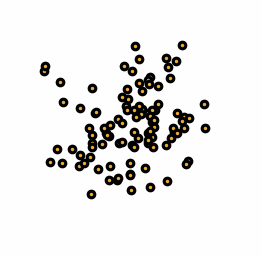

In [274]:
from tqdm import tqdm
x_roll = x_0_roll.clone()

alpha = 0.99
T = 30
t = np.arange(1, T + 1)[::-1]
alpha_bar = alpha**t

x_t = np.random.normal(size=(100, 2))

with GifMaker("oracle.gif", fps=10) as g:
  fig, axs = plt.subplots(1, 1, figsize=(2, 2), dpi=150)
  ax = axs
  ax.scatter(*x_t.T, s=10, c='#EDAC32', edgecolor='k')
  ax.set_xlim(-3, 3)
  ax.set_ylim(-3, 3)
  ax.axis('off')
  
  g.add(fig)

  for i in range(T):
    eps = np.random.normal(size=(100, 2))
    z = np.random.normal(size=(100, 2))

    _x_t = np.sqrt(alpha_bar[i]) * x_roll + np.sqrt(1 - alpha_bar[i]) * eps
    mu = 1/np.sqrt(alpha) * (_x_t - (1 - alpha) / np.sqrt(1 - alpha_bar[i]) * eps)

    x_t = mu #+ 0.01 * z

    fig, axs = plt.subplots(1, 1, figsize=(2, 2), dpi=150)
    ax = axs
    ax.scatter(*x_t.T, s=10, c='#EDAC32', edgecolor='k')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.axis('off')
    
    g.add(fig)

  for _ in range(5):
    fig, axs = plt.subplots(1, 1, figsize=(2, 2), dpi=150)
    ax = axs
    ax.scatter(*x_t.T, s=10, c='#EDAC32', edgecolor='k')
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.axis('off')
    
    g.add(fig)

g.show()

In [391]:
import matplotlib
matplotlib.rc_file_defaults()
from tqdm import tqdm
x_roll = x_0_roll.clone()
x_moon = x_0_moon.clone()
x_mog = x_0_mog.clone()
beta = 0.01

alpha = 1 - beta
T = 50
t = np.arange(1, T + 1)[::-1]
alpha_bar = alpha**t

x_t = np.random.normal(size=(100, 2))
x_roll = x_t.copy()
x_moon = x_t.copy()
x_mog = x_t.copy()

with GifMaker("oracle.gif", fps=10) as g:
  fig, axs = plt.subplots(1, 3, figsize=(6, 2), dpi=150)

  # for ax, x in zip(axs, [x_roll, x_moon, x_mog]):
  #   ax.scatter(*x.T, s=10, c='#EDAC32', edgecolor='k')
  #   ax.set_xlim(-3, 3)
  #   ax.set_ylim(-3, 3)
  #   ax.axis('off')

  # g.add(fig)

    # ax.set_title('t = 0')

  axs[0].text(-2.9, -2.9, 't = 0')

  for i in tqdm(range(T)):
    eps = np.random.normal(size=(100, 2))
    z = np.random.normal(size=(100, 2))
    
    _x_t = np.sqrt(alpha_bar[i]) * x_0_roll.numpy() + np.sqrt(1 - alpha_bar[i]) * eps
    x_roll = 1/np.sqrt(alpha) * (_x_t - (1 - alpha) / np.sqrt(1 - alpha_bar[i]) * eps)# + (1 * z)

    _x_t = np.sqrt(alpha_bar[i]) * x_0_moon.numpy() + np.sqrt(1 - alpha_bar[i]) * eps
    x_moon = 1/np.sqrt(alpha) * (_x_t - (1 - alpha) / np.sqrt(1 - alpha_bar[i]) * eps)# + (1 * z)
    
    _x_t = np.sqrt(alpha_bar[i]) * x_0_mog.numpy() + np.sqrt(1 - alpha_bar[i]) * eps
    x_mog = 1/np.sqrt(alpha) * (_x_t - (1 - alpha) / np.sqrt(1 - alpha_bar[i]) * eps)# + (1 * z)

    fig, axs = plt.subplots(1, 3, figsize=(6, 2), dpi=150)

    for ax, x in zip(axs, [x_roll, x_moon, x_mog]):
      ax.scatter(*x.T, s=10, c='#EDAC32', edgecolor='k')
      ax.set_xlim(-3, 3)
      ax.set_ylim(-3, 3)
      ax.axis('off')

      # ax.set_title(f't = {i + 1}')
    axs[0].text(-2.9, -2.9, f't = {i + 1}')
  
    g.add(fig)

  for _ in range(5):
    for ax, x in zip(axs, [x_roll, x_moon, x_mog]):
      g.add(fig)

g.show()

100%|██████████| 50/50 [00:05<00:00,  8.77it/s]


In [6]:
class NN(torch.nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = torch.nn.Linear(3, 100)
    self.fc2 = torch.nn.Linear(100, 100)
    self.fc3 = torch.nn.Linear(100, 2)
    self.relu = torch.nn.ReLU()

  def forward(self, x, t):
    inp = torch.cat([x, t.repeat(x.shape[0]).unsqueeze(1)], dim=1)
    out = self.fc1(inp)
    out = self.relu(out)
    out = self.fc2(out)
    out = self.relu(out)
    out = self.fc3(out)
    return out

In [7]:
def get_alpha_bar(alpha, t):
  """
  We assume a constant value of alpha
  """
  return alpha ** t

In [8]:
beta = 0.01
alpha = 1 - beta
T = 20
mse = torch.nn.MSELoss()

net = NN()
optimizer = torch.optim.Adam(net.parameters())

# x_0 = x_0_mog.clone()

In [10]:
from tqdm import tqdm
roll_net = NN()
optimizer = torch.optim.Adam(roll_net.parameters())

epochs = 10000

pbar = tqdm(range(epochs))

roll_ls = []
for i in pbar:
  optimizer.zero_grad()

  bs = x_0_roll.shape[0]
  t = torch.randint(0, T, size=(1, ))
  alpha_bar = get_alpha_bar(alpha, T - t)
  eps = torch.randn(bs, 2)
  corrupted_x = torch.sqrt(alpha_bar) * x_0_roll + torch.sqrt(1 - alpha_bar) * eps

  eps_pred = roll_net(corrupted_x, t)

  loss = mse(eps, eps_pred)
  loss.backward()

  optimizer.step()

  roll_ls.append(loss.item())

  pbar.set_description(f'{loss.item():.4f}')

0.6563: 100%|██████████| 10000/10000 [01:09<00:00, 144.79it/s]


In [11]:
from tqdm import tqdm
moon_net = NN()
optimizer = torch.optim.Adam(moon_net.parameters())

pbar = tqdm(range(epochs))

moon_ls = []
for i in pbar:
  optimizer.zero_grad()

  bs = x_0_moon.shape[0]
  t = torch.randint(0, T, size=(1, ))
  alpha_bar = get_alpha_bar(alpha, T - t)
  eps = torch.randn(bs, 2)
  corrupted_x = torch.sqrt(alpha_bar) * x_0_moon + torch.sqrt(1 - alpha_bar) * eps

  eps_pred = moon_net(corrupted_x, t)

  loss = mse(eps, eps_pred)
  loss.backward()

  optimizer.step()

  moon_ls.append(loss.item())

  pbar.set_description(f'{loss.item():.4f}')

0.7483: 100%|██████████| 10000/10000 [00:54<00:00, 184.20it/s]


In [12]:
from tqdm import tqdm
mog_net = NN()
optimizer = torch.optim.Adam(mog_net.parameters())

pbar = tqdm(range(epochs))

mog_ls = []
for i in pbar:
  optimizer.zero_grad()

  bs = x_0_mog.shape[0]
  t = torch.randint(0, T, size=(1, ))
  alpha_bar = get_alpha_bar(alpha, T - t)
  eps = torch.randn(bs, 2)
  corrupted_x = torch.sqrt(alpha_bar) * x_0_mog + torch.sqrt(1 - alpha_bar) * eps

  eps_pred = mog_net(corrupted_x, t)

  loss = mse(eps, eps_pred)
  loss.backward()

  optimizer.step()

  mog_ls.append(loss.item())

  pbar.set_description(f'{loss.item():.4f}')

0.5246: 100%|██████████| 10000/10000 [00:51<00:00, 195.40it/s]


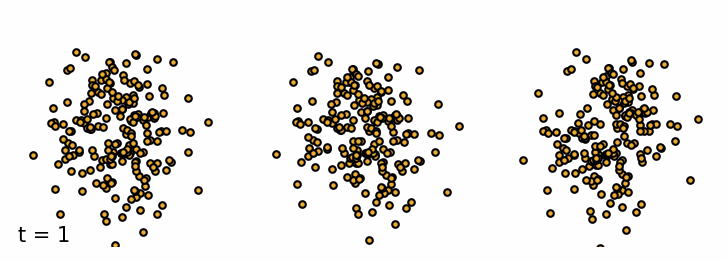

In [380]:
import numpy as np
matplotlib.rc_file_defaults()
x_t = torch.randn(200, 2)

x_roll = x_t.clone()
x_moon = x_t.clone()
x_mog = x_t.clone()

with GifMaker("diffusion_results.gif", fps=10) as g:
  for t in list(range(1, 30)):
    z = torch.randn(x_t.shape[0], 2)

    x_roll = 1/np.sqrt(alpha) * (x_roll - (1 - alpha)/np.sqrt(1 - get_alpha_bar(alpha, t)) * roll_net(x_roll, torch.Tensor([t])).detach()) + beta * z
    x_moon = 1/np.sqrt(alpha) * (x_moon - (1 - alpha)/np.sqrt(1 - get_alpha_bar(alpha, t)) * moon_net(x_moon, torch.Tensor([t])).detach()) + beta * z
    x_mog = 1/np.sqrt(alpha) * (x_mog - (1 - alpha)/np.sqrt(1 - get_alpha_bar(alpha, t)) * mog_net(x_mog, torch.Tensor([t])).detach()) + beta * z
    
    
    fig, axs = plt.subplots(1, 3, figsize=(6, 2), dpi=150)
    for ax, x in zip(axs, [x_roll, x_moon, x_mog]):
      ax.scatter(*x.T, s=10, c='#EDAC32', edgecolor='k')
      ax.set_xlim(-3, 3)
      ax.set_ylim(-3, 3)
      ax.axis('off')

    axs[0].text(-2.9, -2.9, f't = {t}')

    g.add(fig)

  for _ in range(5):
    fig, axs = plt.subplots(1, 3, figsize=(6, 2), dpi=150)
    for ax, x in zip(axs, [x_roll, x_moon, x_mog]):
      ax.scatter(*x.T, s=10, c='#EDAC32', edgecolor='k')
      ax.set_xlim(-3, 3)
      ax.set_ylim(-3, 3)
      ax.axis('off')

    axs[0].text(-2.9, -2.9, f't = 30')

    g.add(fig)

g.show()

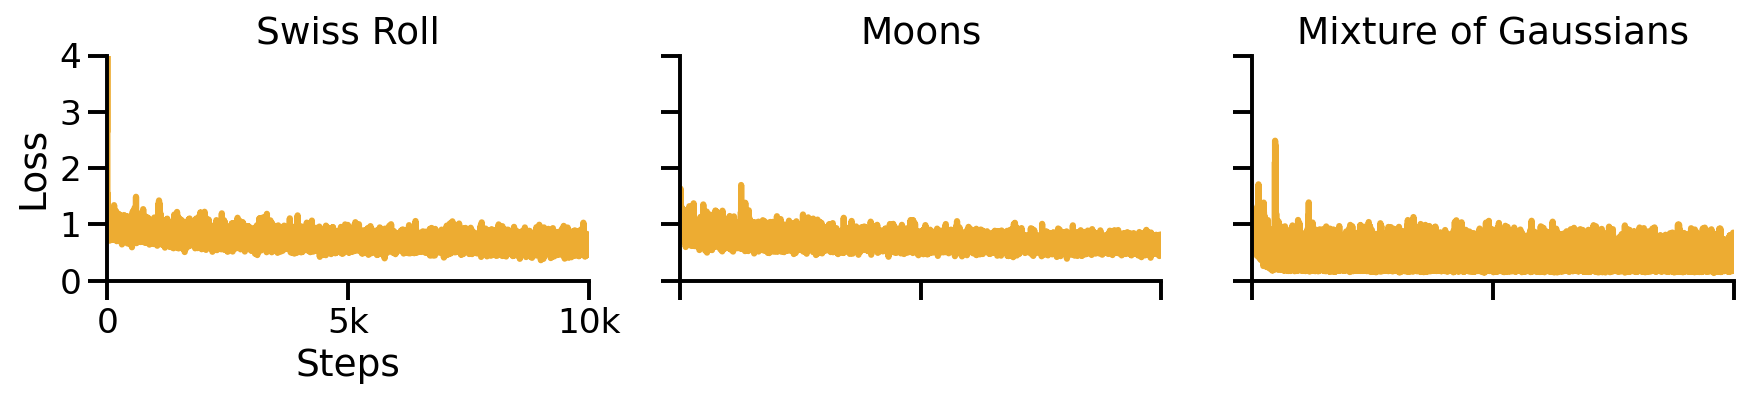

In [37]:
import seaborn as sns
sns.set_context('talk')

fig, axs = plt.subplots(1, 3, figsize=(12, 3), dpi=150, sharey=True)
axs[0].plot(np.array(roll_ls), c='#EDAC32', lw=3)
axs[1].plot(np.array(moon_ls), c='#EDAC32', lw=3)
axs[2].plot(np.array(mog_ls), c='#EDAC32', lw=3)

axs[0].set_xticklabels([0, '5k', '10k'])
axs[1].set_xticklabels(['', '', ''])
axs[2].set_xticklabels(['', '', ''])

axs[0].set_title('Swiss Roll')
axs[1].set_title('Moons')
axs[2].set_title('Mixture of Gaussians')

axs[0].set_xlabel('Steps')
axs[0].set_ylabel('Loss')

axs[0].set_xlim(0, 10_000)
axs[1].set_xlim(0, 10_000)
axs[2].set_xlim(0, 10_000)

axs[0].set_ylim(0, 4)

sns.despine(trim=True)

plt.tight_layout()
plt.savefig('training_loss', dpi=150, bbox_inches='tight')

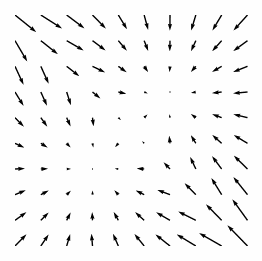

In [382]:
matplotlib.rc_file_defaults()
import numpy as np

sns.set_context('talk')

N = 10
x = np.stack(np.meshgrid(np.linspace(-3, 3, N), np.linspace(-3, 3, N)), -1)
x = x.reshape(-1, 2)
x = torch.Tensor(x)

with GifMaker("diffusion_results_gradient.gif", fps=10) as g:
  for t in list(range(1, 30)):
    eps = -mog_net(x, torch.Tensor([t])).detach()#.reshape(N, N, 2)

    fig, axs = plt.subplots(1, 1, figsize=(2, 2), dpi=150)
    ax = axs

    ax.quiver(x[..., 0], x[..., 1], eps[..., 0], eps[..., 1])
    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.axis('off')
    g.add(fig)

  # for _ in range(5):
  #   g.add(fig)

g.show()

In [390]:
import numpy as np
matplotlib.rc_file_defaults()

sns.set_context('talk')


N = 10
x = np.stack(np.meshgrid(np.linspace(-3, 3, N), np.linspace(-3, 3, N)), -1)
x = x.reshape(-1, 2)
x = torch.Tensor(x)

with GifMaker("diffusion_results_gradient.gif", fps=10) as g:
  for t in list(range(1, 30)):
    z = torch.randn(x_t.shape[0], 2)

    eps_roll = -roll_net(x, torch.Tensor([t])).detach()
    eps_moon = -moon_net(x, torch.Tensor([t])).detach()
    eps_mog = -mog_net(x, torch.Tensor([t])).detach()
    
    
    fig, axs = plt.subplots(1, 3, figsize=(6, 2), dpi=150)
    for ax, eps in zip(axs, [eps_roll, eps_moon, eps_mog]):
      ax.quiver(x[..., 0], x[..., 1], eps[..., 0], eps[..., 1], width=0.01)
      ax.set_xlim(-3, 3)
      ax.set_ylim(-3, 3)
      ax.axis('off')

    # axs[0].text(-2.9, -2.9, f't = {t}')

    g.add(fig)

g.show()

In [58]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [51]:
def constant_variance_scheduling(T, beta=1e-2):
  return beta * torch.ones(T)

In [52]:
def linear_variance_scheduling(T, beta_1=1e-4, beta_T=0.02):
    """
    Precomputes the variance for each time step.
    """
    return beta_1 + (beta_T - beta_1) * torch.arange(T) / (T - 1)

In [94]:
def cosine_variance_scheduling(T, s=1e-10, beta_max=0.999):
    """
    Precomputes the variance for each time step.
    """
    f = lambda t: torch.cos((np.pi/2) * (t/T + s) / (1 + s))**2
    alpha = f(torch.arange(T)) / f(torch.Tensor([0]))
    return torch.clamp(1 - (alpha[1:] / alpha[:-1]), max=beta_max)

In [118]:
T = 1000
beta_constant = constant_variance_scheduling(T)
beta_linear = linear_variance_scheduling(T)
beta_cosine = cosine_variance_scheduling(T)

In [119]:
plt.plot(beta_constant / beta_constant.max())
plt.plot(beta_linear / beta_linear.max())
plt.plot(beta_cosine / beta_cosine.max())

(0.0, 0.03)

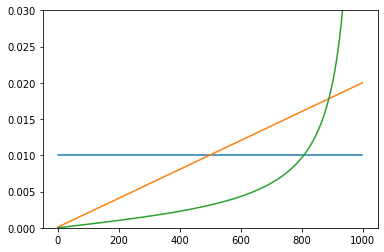

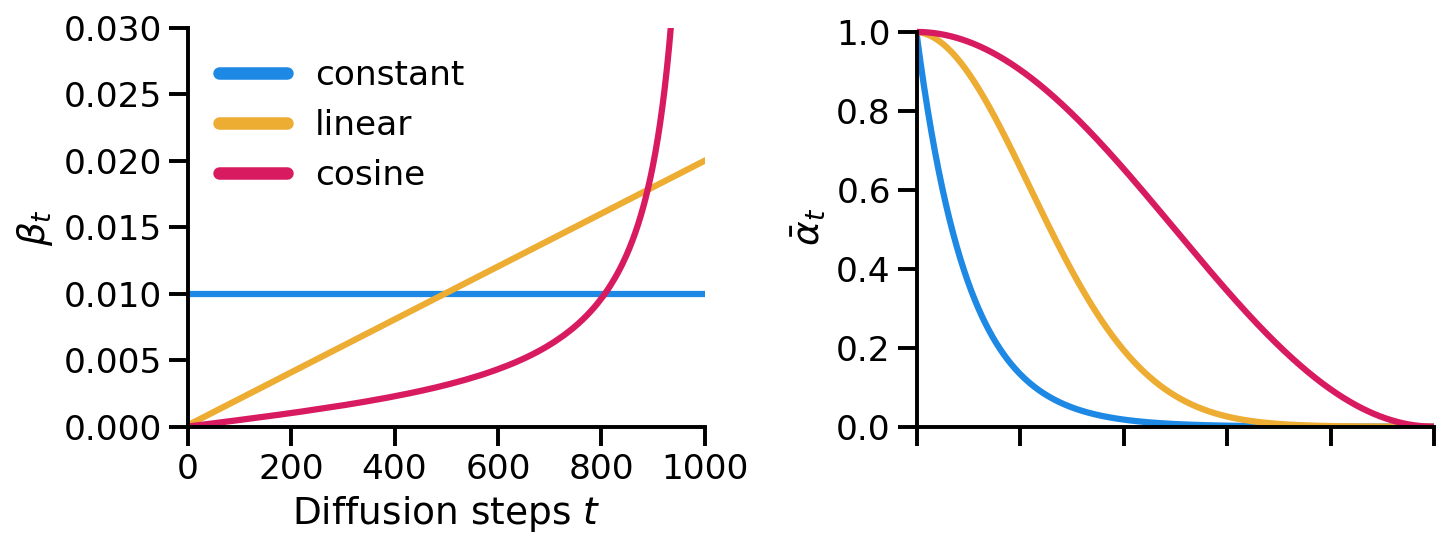

In [156]:
import seaborn as sns
sns.set_context('talk')

fig, axs = plt.subplots(1, 2, figsize=(10, 4), dpi=150)
axs[0].plot(beta_constant, c='#1E88E5', label='constant', lw=3)
axs[0].plot(beta_linear, c='#EDAC32', label='linear', lw=3)
axs[0].plot(beta_cosine, c='#D81B60', label='cosine', lw=3)
axs[0].set_ylim(0, 0.03)
axs[0].set_xlim(0, 1000)
lgnd = axs[0].legend(frameon=False)

for h in lgnd.legendHandles[:3]:
    h.set_linewidth(6.0)
    h.set_solid_capstyle("round")

axs[0].set_xlabel('Diffusion steps $t$')
axs[0].set_ylabel('$\\beta_t$')

axs[1].plot(torch.cumprod(1 - beta_constant, 0), c='#1E88E5', lw=3)
axs[1].plot(torch.cumprod(1 - beta_linear, 0), c='#EDAC32', lw=3)
axs[1].plot(torch.cumprod(1 - beta_cosine, 0), c='#D81B60', lw=3)
axs[1].set_xlim(0, 1000)

axs[1].set_xticklabels([''] * 6)
axs[1].set_ylim(0, 1.01)
axs[1].set_ylabel('$\\bar{\\alpha}_t$')

sns.despine(trim=True)
plt.tight_layout()
plt.savefig('variance_schedule.png', dpi=150, bbox_inches='tight')

(0.95, 1.05)

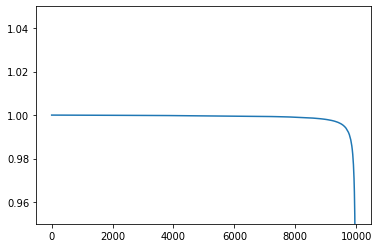

In [117]:
t = torch.arange(0, 10000)
s = 1e-2
alpha = torch.cos((np.pi/2) * (t/T + s) / (1 + s))**2

plt.plot(alpha[1:] / alpha[:-1])
plt.ylim(0.95, 1.05)

In [107]:
alpha[-1] / alpha[-2]

tensor(0.2501)

In [108]:
alpha[1] / alpha[0]

tensor(1.)

In [109]:
alpha[-1], alpha[-2]

(tensor(2.4672e-08), tensor(9.8642e-08))